# **Daltix Data Analyst Challenge**
In this challenge you will explore a subset of data that mirrors (in a simplified manner) some of the data we work with at Daltix.  
The goal of this challenge is to explore the data we provide and share all insights you find relevant in a business-friendly manner.
  
Some tips:
* Imagine you are presenting these to both technical and non-technical members of your company. 
* Take into consideration that the code you produce should be readable and reusable by a colleague in the future.


**Good luck**! 😀

> The Daltix Team
______________

### The Challenge starts here

In [1]:
import pandas as pd
import pandasql as ps
# ...

______________
## 1. Extract the data
**Description**

In this section you will focus on importing the files from the dataset that was provided and do a simple QA of the data.
  
After completing it you should be have all 4 tables locally available.

_Question:_
* Did you notice any quality issues with the files we provided? If so, can you list them? How did you deal with them? 

**Solution**

Lets extract the 4 csv files into 4 pandas dataframes

In [2]:
import io
import requests

def getData(url, delim=","): # after getting an error when trying to use the default delim (,) I decided to include this option
    s=requests.get(url).content
    data=pd.read_csv(io.StringIO(s.decode('utf-8')),sep=delim)
    return data

main_url="https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/"
product_df=getData(main_url+"product.csv")
price_df=getData(main_url+"price.csv")
category_df=getData(main_url+"category.csv", delim="|") 
promo_df=getData(main_url+"promo.csv")

Lets take a quick look into how each dataset was imported

In [3]:
product_df.head()

,daltix_id,product_id,article_nr,shop,country,name,brand,eans,contents
0,001b94cf378a9827f698393795988539bdc1909a70674d...,832766,2474959.0,shop4,be,Nivea sun SOS Aftersun herstel. 200ml,Nivea sun,NaN,"{\n ""approximate_content"": ""false"",\n ""conte..."
1,002c30e9451e4f42283545ba979ac8a7f807668e85c55a...,3263396,158087.0,shop3,be,BRABANTIA Tasty ijsschep munt,BRABANTIA,NaN,"{\n ""content_value"": ""NaN""\n}"
2,005d13004d634e1eb2e384239d0f328bc8ec445556b6c6...,10763,3816367.0,shop4,be,Boerinneke hagelslag suikervrij 200g,Boerinneke,"[\n ""05411146223898""\n]","{\n ""approximate_content"": ""false"",\n ""conte..."
3,005eb33441fd41c81ba3bced9ab90e48b71fafcfe18f0e...,6479,NaN,shop1,nl,Slips of strings,NaN,NaN,"{\n ""approximate_content"": ""false"",\n ""conte..."
4,00622df3e2f6236a5f09e44b400acaaaec363f699d1ef4...,4024160,5287.0,shop3,be,BONI Torpedo RaketStarship,BONI,"[\n ""05400141240870""\n]","{\n ""approximate_content"": ""false"",\n ""conte..."


In [4]:
price_df.head()

,daltix_id,shop,country,product_id,location,price,unit_std,date
0,0000ba625520cd774f3fc738e27d9d2beb795995c99c38...,shop4,be,888810,ans,14.99,su,2019-10-09
1,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,1.75,su,2019-08-07
2,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,1.75,su,2019-10-07
3,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,7.00,kg,2019-10-03
4,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ledeberg,6.84,kg,2019-08-10


In [5]:
category_df.head()

,shop,country,daltix_id,categories
0,shop4,be,21da5385ea831537d7c7b5b298f2d7eefbb2ec81413adb...,"[\n [\n ""Groenten en fruit"",\n ""Verse g..."
1,shop1,nl,1095d3a2e7aca5753a104d5d3c1106d0333f20d565f418...,"[\n [\n ""Onze aanbiedingen"",\n ""Weekact..."
2,shop1,nl,70b4b5051757b3dc4f91463736c6636dcdb9bc02bd262b...,"[\n [\n ""Onze aanbiedingen"",\n ""Aanbied..."
3,shop1,nl,55e5629d4fe138d2449d6f39a2b61f0b32d52493decb7e...,"[\n [\n ""Onze aanbiedingen"",\n ""Weekend..."
4,shop4,be,1ca5dc935e07f0d85c37f4e0b2e6d61611868d447ece87...,"[\n [\n ""Lichaamsverzorging/Parfumerie"",\n..."


In [6]:
promo_df.head()

,daltix_id,shop,country,location,promo_type,dlevel,date
0,d264f89c1d56a03ac2ad1fb79c2f58f246b4eb00f39647...,shop3,be,ledeberg,Price cut with MinAmount Condition,0.200000,2019-09-04
1,0868046f91601046f805187f8f029af152634724d42483...,shop4,be,ledeberg,Price cut with MinAmount Condition,0.300000,2019-08-11
2,eab88f8cf357d31f139762dad0c481b5cd7a8e6c7ace93...,shop3,be,ledeberg,Price cut with MinAmount Condition,0.333400,2019-09-19
3,edb8f9fbdfa192377bb54362166e4ddc422db6bc94bad9...,shop4,be,ans,Price cut with MinAmount Condition,0.300000,2019-08-17
4,954ebce9a5c18db4e9b67407c3447c433a88f30b67217f...,shop3,be,ans,Price cut with MinAmount Condition,0.097674,2019-08-21


**Answer to the question**

The data was imported to 4 different pandas dataframes in order to start the data analysis. By giving a quick look into how each dataset was imported (using pandas _.head()_ function), I cannot identify any early major quality issues. Probably in the exploration phase things will get 'uglier', but for now, and based on each df sneak peak, it seems that each column was correctly imported. However, I notice some things that may cause some issues and should be taken into account:
* As it is possible to check in the code above, not all the columns have the same separator. _Category.csv_ does not have a comma as separator but rather a '|'
* I notice that for product.csv and category.csv there are 2 columns that present an aggregation of information: ___contents___ (a dictionary) and ___categories___ (a list). We should be carefull with this columns because they have a lot newline ('\n') characters, which may corrupt the definition of an individual element in the dataset, by mixing the values of each column. This was not a problem when importing data using pandas, but it could be when using other tools to analyze it. 


_____________________
## 2. Explore the dataset

**Requirements:**
Use `pandasql` to query the tables and explore the dataset

**Description**

In this section you are free to explore the data however you like in order get to know your dataset. It's meant to be exploratory and only for you to get familiar with the data.

At the end of this section you should be able to, at least, answer the following questions:
* For which time interval you have prices for?
* How many shops are comprised in the dataset?
* How many different products are there per shop in the dataset?
* Can a product have more than 1 active promotion at the same time? 

You are free (and __encouraged__) to further describe the dataset as you see fit.

**Solution**

Lets include all the loaded csvs into a single list in order to be easier to conduct the analysis. First lets check the size of each one

In [52]:
dfs=[product_df,price_df,category_df,promo_df]
for df in dfs:
    print(df.shape)

(4233, 9)
(8250549, 8)
(3368, 4)
(9456, 7)


To qucikly perfrom EDA on each file, i'm going to use the ___pandas profilling___ library which provides a complete analysis of a given dataset

**EDA for Product_df**

In [ ]:
# Run this line if you don't have the library installed 

!pip install pandas-profiling

Lets start with product_df 

In [53]:
import pandas_profiling

pandas_profiling.ProfileReport(dfs[0])

Number of variables,9
Number of observations,4233
Total Missing (%),15.9%
Total size in memory,297.7 KiB
Average record size in memory,72.0 B
Numeric,1
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Since Pandas profilling did not consider product_id as a numeric column we should investigate the existence of strange values as product_id

In [9]:
ps.sqldf("""select product_id from product_df where product_id*1!=product_id""",locals()) 

,product_id
0,S2016011203619910000
1,S2014071100236930013
2,S2016112903679110000
3,S2016081603664690000
4,S2019052100255310000
5,S2018062700077800000


eans column contains some records that are not unique. These should be investigated since EAN is an unique code that refers only to one product

In [54]:
ps.sqldf("""select product_id, count(distinct eans) 
            from product_df 
            where eans is not null and eans!='[]'
            group by product_id 
            having count(distinct eans)>1""",locals())

,product_id,count(distinct eans)
0,10315,2
1,3451217,2
2,3751716,2


There are 3 records with more than 1 ean lets check them 

In [59]:
ps.sqldf("""select product_id, eans
            from product_df 
            where product_id=10315 or product_id=3451217 or product_id=3751716 """,locals())

,product_id,eans
0,10315,"[\n ""05400141189926"",\n ""05400141190694""\n]"
1,3451217,"[\n ""05400141159349"",\n ""05400141378139""\n]"
2,3751716,"[\n ""05400141159851"",\n ""05400141289619""\n]"
3,10315,"[\n ""05400141190694""\n]"
4,3751716,"[\n ""05400141159851""\n]"
5,3451217,"[\n ""05400141378139""\n]"


It seems that after all these records are fine because one product can have more than 1 ean code, and all the single values still appear on each list of values

**Conclusions and further steps**

By analyzing product we can take the following conclusions:
* Article_nr, Brand and Eans contain a missing info. I guess this must be related with the fact that information was collected using a crawler which was not able to get this info from the product webstore page or simply it was not available for that particular item.
* Article_nr is numeric but should be converted to categorical since its values do not have any numerical meaning but rather a label for each article
* Contents should be converted to 3 different columns: __approximate_content__ which should have 2 values: _aprox_ if the value is an aproximation or _exact_ if the value is exact; __content_value__ which should be numeric and contain the content of the product and __content_unit__, that should be categorical and contain the unit being used for each content value __CORRECTION__: in the transforming and manipulation section, after performing the split, I checked that _aproximate__content_ has only 2 values: _True_ or _False_, I was mislead by the github readme info that gives as example values _(e.g. "200g" vs "±200g")_
* Product_id was not consider as a categorical column which made me question about wheter its values are all numbers or not. The conducted analysis shows that there are 6 values that present a strange value which contain the character "S". __CORRECTION__: after analyzing price_df I saw that this nomenclature also seems to exist (with a lot more entries) in this dataset which indicates that apparently there is nothing wrong with this column
* There are 41 duplicate values that should be removed. 

__EDA for Price_df__

In [13]:
pandas_profiling.ProfileReport(dfs[1])

Number of variables,8
Number of observations,8250549
Total Missing (%),0.0%
Total size in memory,503.6 MiB
Average record size in memory,64.0 B
Numeric,1
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Lets investigate date to answer to the question how _"For which time interval you have prices for?"_ Since prices are never null we know that we have a price for each available date

In [112]:
date_interval=ps.sqldf("""select min(date),max(date) from price_df""",locals())
date_interval

,min(date),max(date)
0,2019-08-01,2019-10-15


In [124]:
import datetime

datetime.datetime.strptime(date_interval.iloc[0,1], '%Y-%m-%d')-datetime.datetime.strptime(date_interval.iloc[0,0], '%Y-%m-%d')

datetime.timedelta(days=75)

Since we have repeated product ids, lets check if prices change for a given product id, for example 5353 the most frequent one

In [133]:
max_id=ps.sqldf("""select product_id, price from price_df 
                    where product_id=5353 order by price desc limit 10""",locals())
max_id

,product_id,price
0,5353,308.75
1,5353,308.75
2,5353,308.75
3,5353,103.75
4,5353,6.98
5,5353,6.98
6,5353,6.98
7,5353,6.98
8,5353,6.98
9,5353,6.98


Lets use the price_df to answer the question _how many different products are there per shop in the dataset_, since this dataset is the one that contains the highest number of shop records

In [14]:
ps.sqldf("""select shop, count(distinct product_id) from price_df group by shop""",locals())  

,shop,count(distinct product_id)
0,shop1,4683
1,shop2,17996
2,shop3,9432
3,shop4,17791


**Conclusions and further steps**

By analyzing price we can take the following conclusions:
* Price column has 1842 values with a value of 0 which is strange since a product cannot have 0 as cost ( maybe it is free? )
* Price is also highly left skewed with a median value of 4.5 and a maximum value of 3472200
* There are multiple prices for the same product_id
* Date column is categorical and should be converted to date type
* There are 1649 duplicates that should be removed

__EDA for category_df__

In [152]:
# We have to create a dummy column to run the pandas profile report
category_df['ignore']=0
pandas_profiling.ProfileReport(category_df)

Number of variables,5
Number of observations,3368
Total Missing (%),0.0%
Total size in memory,131.6 KiB
Average record size in memory,40.0 B
Numeric,0
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [153]:
#Now we should drop the ignore column since it was used only for creating the profile report
category_df=category_df.drop('ignore',axis=1)

Lets also check the maximum number of categories that a product can have. Each record in categories is a list of lists. Inside each list we have categories and sub categories. Therefore we should not split by ',' but rather by '],' 

In [190]:
category_df['count'] = category_df.apply(lambda x: [len(cat.split('],')) for cat in category_df.categories])
category_df[['categories','count']].sort_values(by=['count'],ascending=False).head()

,categories,count
1966,"[\n [\n ""Bereidingen/Charcuterie/Vis/Veggi...",3
3323,"[\n [\n ""Bereidingen/Charcuterie/Vis/Veggi...",3
1262,"[\n [\n ""Chips/Borrelhapjes"",\n ""Gedroo...",3
2583,"[\n [\n ""Chips/Borrelhapjes"",\n ""Gedroo...",3
1044,"[\n [\n ""Bereidingen/Charcuterie/Vis/Veggi...",3


In [206]:
category_df.categories[1262]

'[\n  [\n    "Chips/Borrelhapjes",\n    "Gedroogde tomaten/Tapenades en overige"\n  ],\n  [\n    "Conserven",\n    "Groenteconserven",\n    "Gedroogde tomaten/Tapenades en overige"\n  ],\n  [\n    "Kruidenierswaren/Droge voeding",\n    "Bouillon/Smaakmakers",\n    "Gedroogde tomaten/Tapenades en overige"\n  ]\n]'

We can have up to 3 sub-categories for each product 

**Conclusions and further steps**

By analyzing category we can take the following conclusions:
* There are no missing values 
* Categories should by divided in 3 group-categories. These group categories contain lists of a category and sub categories

__EDA for promo_df__

In [208]:
pandas_profiling.ProfileReport(promo_df)

Number of variables,7
Number of observations,9456
Total Missing (%),0.0%
Total size in memory,517.2 KiB
Average record size in memory,56.0 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,1


Lets check the date interval for the existing promotions

In [209]:
date_interval=ps.sqldf("""select min(date),max(date) from promo_df""",locals())
date_interval

,min(date),max(date)
0,2019-08-01,2019-10-15


In [210]:
datetime.datetime.strptime(date_interval.iloc[0,1], '%Y-%m-%d')-datetime.datetime.strptime(date_interval.iloc[0,0], '%Y-%m-%d')

datetime.timedelta(days=75)

Since there are some records that have discount level of zero, lets check them against promo_type to see if they make sense or not

In [15]:
ps.sqldf("""select promo_type from promo_df where dlevel=0""",locals()).iloc[:,0].value_counts()

Volume Increase    348
Name: promo_type, dtype: int64

Lets answer to the question _Can a product have more than 1 active promotion at the same time_

In [28]:
promos=ps.sqldf("""SELECT daltix_id, date, COUNT(DISTINCT promo_type) as c FROM promo_df GROUP BY daltix_id, date HAVING (c >1)""")
promos

,daltix_id,date,c
0,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-01,2
1,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-02,2
2,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-03,2
3,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-04,2
4,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-05,2
5,040022ef6979b8eef44bb64d4635fc28f4f9b1546d4523...,2019-08-28,2
6,040022ef6979b8eef44bb64d4635fc28f4f9b1546d4523...,2019-08-29,2
7,040022ef6979b8eef44bb64d4635fc28f4f9b1546d4523...,2019-08-30,2
8,040022ef6979b8eef44bb64d4635fc28f4f9b1546d4523...,2019-08-31,2
9,040022ef6979b8eef44bb64d4635fc28f4f9b1546d4523...,2019-09-01,2


It seems that in fact a product can have more than 1 promotion at the same time. Lets check a single record to understand what type of codes we have

In [33]:
promos.iloc[0,0]

'0240081b297cd3410271094392acb78a45b69b1e3b44adc676a428755ebf69fa'

In [39]:
ps.sqldf("""SELECT daltix_id, date, promo_type from promo_df where daltix_id='0240081b297cd3410271094392acb78a45b69b1e3b44adc676a428755ebf69fa' order by date""")

,daltix_id,date,promo_type
0,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-01,Price cut with MinAmount Condition
1,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-01,Price cut with MinAmount Condition and Indication
2,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-02,Price cut with MinAmount Condition
3,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-02,Price cut with MinAmount Condition and Indication
4,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-03,Price cut with MinAmount Condition and Indication
5,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-03,Price cut with MinAmount Condition
6,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-04,Price cut with MinAmount Condition
7,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-04,Price cut with MinAmount Condition and Indication
8,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-05,Price cut with MinAmount Condition and Indication
9,0240081b297cd3410271094392acb78a45b69b1e3b44ad...,2019-08-05,Price cut with MinAmount Condition


**Conclusions and further steps**

By analyzing promo we can take the following conclusions:

* There are only promotions for one single country Belgium (_BE_)
* There are some promotions that have a 0 discount_level. For this type of discounts we always have the same promo_type value: _Volume Increase_ 
* There are no promotions for _shop 1_
* By looking at the histogram of dlevel it seems that some values are already in %

**Answers to the questions**

* For which time interval you have prices for?
  - By inspecting the datasets that have a date column (price and promo), we can conclude that this sample corresponds to a 75 day interval
* How many shops are comprised in the dataset?
  - There are 4 shops  
* How many different products are there per shop in the dataset?
  - For _shop 1_ we have 4683 products, for _shop 2_ 17996 products, for _shop 3_ 9432 products and for _shop 4_ we have 17791 products
* Can a product have more than 1 active promotion at the same time? 
  - Yes we can. For the presented record we have 2 promo types for the same product: _Price cut with MinAmount Condition_ and _Price cut with MinAmount Condition and Indication_

___________________________
## 3 Transformation & Manipulation

__Description__

In this section you should use the tables provided in the dataset and manipulate them to find valuable business insights.

Some questions you should be able to answer:
* Which shops have a bigger overlap in their assortment?
* Which shop has the overall cheapest assortment? What about cheapest categories?
* Which shop is the "_king_" of promotions?
* Where would you do your shopping? When? Why?
* Can you spot any weird price behaviour? 

The questions above are just some example questions. You should provide any insights you find useful/relevant.

_Note:_
* Use this section as a prepation for the next!

First lets create a master dataframe with all the dataframes available. To join every df lets use daltix_id column

In [125]:
df_final = pd.merge(price_df,category_df, on=['daltix_id','country','shop'], how='inner')
print(df_final.shape)
df_final = pd.merge(df_final,product_df, on=['daltix_id','country','product_id','shop'], how='inner')
print(df_final.shape)
df_final = pd.merge(df_final,promo_df, on=['daltix_id','date','location','country','shop'], how='inner')
print(df_final.shape)
df_final.columns

(175618, 9)
(176273, 14)
(10859, 16)


Index(['daltix_id', 'shop', 'country', 'product_id', 'location', 'price',
       'unit_std', 'date', 'categories', 'article_nr', 'name', 'brand', 'eans',
       'contents', 'promo_type', 'dlevel'],
      dtype='object')

Now lets remove all the duplicates that exist in the dataframe

In [126]:
df_final=df_final.drop_duplicates()
df_final.shape

(10810, 16)

Since now we have a lot less results, lets run the profile report again and check how the dataset looks

In [290]:
pandas_profiling.ProfileReport(df_final)

Number of variables,17
Number of observations,10810
Total Missing (%),2.6%
Total size in memory,1.4 MiB
Average record size in memory,136.0 B
Numeric,4
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,1


As expected after joining the promo_df with price, product and category, we get results only for Belgium, since promos are only available in this country. Since we are dealing with are now dealing with records that correspond to Belgium, we only have 2 available stores: _shop 3_ and _shop 4_

We also have a lot of records sharing the same daltix_id (many records correspond to the same product). This happens because we preserve the date column, which makes us have multiple promotions at different times for the same product. Lets inspect the date interval that we are working with by converting date to date type and subtracting the minimun value to the maximum 

In [127]:
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['date'].max()-df_final['date'].min()

Timedelta('75 days 00:00:00')

We still have a date interval of 75 days as before. Now lets convert the aggregated columns (_categories_ and _contents_) into multiple columns

In [128]:
import json

def string_to_dict(dict_string):  #to convert from string type to dictionary
    return json.loads(dict_string)

def splitContents(df):
    col=df.contents
    col=col.apply(string_to_dict)
    approximate_content=[]
    content_unit=[]
    content_value=[]
    for content in col:
        approximate_content.append(content.get('approximate_content'))
        content_unit.append(content.get('content_unit'))
        content_value.append(content.get('content_value'))
    df['approximate_content']=approximate_content
    df['content_unit']=content_unit
    df['content_value']=content_value
    df=df.drop('contents',axis=1)
    return df

df_final=splitContents(df_final)
df_final.columns

Index(['daltix_id', 'shop', 'country', 'product_id', 'location', 'price',
       'unit_std', 'date', 'categories', 'article_nr', 'name', 'brand', 'eans',
       'promo_type', 'dlevel', 'approximate_content', 'content_unit',
       'content_value'],
      dtype='object')

Now lets check the values obtained for each column

In [116]:
print(df_final.approximate_content.value_counts())
print("")
print(df_final.content_unit.value_counts())
print("")
print(df_final.content_value.value_counts())

false    10299
true         6
Name: approximate_content, dtype: int64

g           3656
ml          3258
cl          1109
st           492
d            443
l            343
200ml        341
kg           211
dosissen     107
gratis       101
150ml         91
8             55
75ml          51
625g          48
300ml         46
personen      27
75cl          18
Name: content_unit, dtype: int64

375     898
75      880
150     628
250     551
33      504
30      499
50      473
500     453
80      442
NaN     413
300     385
90      346
55      330
200     323
400     275
280     217
60      209
440     203
15      160
1       154
180     151
166     136
1.85    133
6       128
38      126
100     125
3.9     120
185     110
105     109
45      107
680     107
1.5     106
210     105
130     101
260     100
450      79
36       79
40       56
201      55
179      55
175      54
74       53
35.5     48
19       48
2.5      41
25       35
750      29
160      23
2018     18
70       16
2     

And now lets perform the split for the categories column. Before doing it lets clean each value and check the maximum number of categories that one can have after df_final creation

In [129]:
import itertools

def cleanCategories(category_list): #remove \n and "[" and converts everything into a list of strings 
    category_list=category_list.replace("\n","").replace('[',"").split('],')
    category_list=[string.replace(']','').split(',') for string in category_list]
    new_category_list=[]
    for string in category_list:
        new_string=[]
        for x in string:
            x=eval(x)
            new_string.append(x)
        new_category_list.append(new_string)
    new_category_list=list(set(itertools.chain.from_iterable(new_category_list)))
    return new_category_list
    
df_final['categories']=df_final.categories.apply(cleanCategories)
print(max([len(e) for e in df_final.categories]))  # to get the maximum number of possible categories

6


Now lets divide each value by categories.

In [130]:
def splitCategories(df):
    categories=[[]]*6
    col=list(df.categories)
    cat_df=pd.DataFrame(col)
    cat_df.set_index(df.index,inplace=True)
    df=pd.concat([df, cat_df], axis=1)
    df.drop('categories',axis=1,inplace=True)
    return df

df_final=splitCategories(df_final)

Rename columns

In [131]:
df_final.rename({0:'cat_1',1:'cat_2',2:'cat_3',3:'cat_4',4:'cat_5',5:'cat_6'}, axis='columns',inplace=True)
df_final.columns

Index(['daltix_id', 'shop', 'country', 'product_id', 'location', 'price',
       'unit_std', 'date', 'article_nr', 'name', 'brand', 'eans', 'promo_type',
       'dlevel', 'approximate_content', 'content_unit', 'content_value',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6'],
      dtype='object')

**Answers to the questions**

_Which shops have a bigger overlap in their assortment?_ I had some dificulties trying to interpret this question. For me, what is being asked is which is the store that has the highest number of overlaps in terms of products

In [96]:
df_final.groupby(['shop','product_id'],as_index=False).count()[['shop','product_id','daltix_id']].rename(columns={"daltix_id": "count"}).sort_values(by=['count'],ascending=False).head(10)

,shop,product_id,count
62,shop3,3871354,133
199,shop4,6384,126
19,shop3,1956233,126
184,shop4,5507,119
37,shop3,3437134,117
186,shop4,5695,113
69,shop3,3995714,109
173,shop4,4369,108
106,shop4,12088,108
217,shop4,8680,106


_Which shop has the overall cheapest assortment? What about cheapest categories?_ We have to account with dates and for that reason we should group by shop and product_id and calculate the average for price. After that we sum everything by shop and calculate the average by shop

In [97]:
avg_prices=df_final.groupby(['shop','product_id'],as_index=False).mean()[['shop','product_id','price']]
print("Shop 3 has as overall assortment: {}".format(avg_prices.loc[avg_prices['shop']=="shop3"]['price'].mean()))
print("Shop 4 has as overall assortment: {}".format(avg_prices.loc[avg_prices['shop']=="shop4"]['price'].mean()))

Shop 3 has as overall assortment: 10.156866609677524
Shop 4 has as overall assortment: 16.52164316713734


The shop with the overall cheapest assortment is _shop 3_. 

Now which categories are the cheapest ones? Lets check that for each category

In [136]:
print(df_final.groupby(['cat_1'],as_index=False).min()[['cat_1','price']].min())
print(df_final.groupby(['cat_2'],as_index=False).min()[['cat_2','price']].min())
print(df_final.groupby(['cat_3'],as_index=False).min()[['cat_3','price']].min())
print(df_final.groupby(['cat_4'],as_index=False).min()[['cat_4','price']].min())
print(df_final.groupby(['cat_5'],as_index=False).min()[['cat_5','price']].min())
print(df_final.groupby(['cat_6'],as_index=False).min()[['cat_6','price']].min())

cat_1    12 maanden
price          0.03
dtype: object
cat_2    Abdijbier
price         0.03
dtype: object
cat_3    Abdijbier / Trappist
price                    0.03
dtype: object
cat_4    6 maanden
price         0.25
dtype: object
cat_5    Bereidingen/Charcuterie/Vis/Veggie
price                                  3.49
dtype: object
cat_6    Kruidenierswaren/Droge voeding
price                              3.49
dtype: object


The cheapest categories are _12 manden_ with a value of 0.03 for the main category. When it comes to the subcategories, the cheapest ones are _Abdijier_ for sub category 2 and  _Abdijbier / Trappist_ for sub category 3 with a value of 0.03 also.

_Which shop is the "king" of promotions?_ 

In [166]:
# Convert % values 
df_final['dlevel']=[d/100 if d>1 else d for d in df_final['dlevel']]
discounts=df_final.loc[df_final['dlevel']!=0].groupby(['shop','dlevel'],as_index=False).count()[['shop','dlevel','daltix_id']]
discounts.head()

,shop,dlevel,daltix_id
0,shop3,0.028674,16
1,shop3,0.031250,20
2,shop3,0.048485,56
3,shop3,0.050074,7
4,shop3,0.050125,10


Now checking discounts for shop3

In [172]:
print("Total number of discounts in 75 days: "+str(discounts.loc[discounts['shop']=='shop3']['daltix_id'].sum()))
discounts.loc[discounts['shop']=='shop3'].describe()

Total number of discounts in 75 days: 4183


,dlevel,daltix_id
count,46.000000,46.000000
mean,0.178841,90.934783
std,0.151716,265.300283
min,0.028674,2.000000
25%,0.070220,6.250000
50%,0.100738,14.000000
75%,0.287814,23.000000
max,0.714286,1705.000000


Now checking for shop4

In [171]:
print("Total number of discounts in 75 days: "+str(discounts.loc[discounts['shop']=='shop4']['daltix_id'].sum()))
discounts.loc[discounts['shop']=='shop4'].describe()

Total number of discounts in 75 days: 5974


,dlevel,daltix_id
count,16.000000,16.000000
mean,0.267262,373.375000
std,0.122105,571.498367
min,0.052910,2.000000
25%,0.165101,23.750000
50%,0.275628,141.000000
75%,0.339178,396.500000
max,0.500000,1913.000000


For this question the _shop4_ is king since it offers a higher mean and median discounts with a lower level o standard deviation. The number of dicounts throughout the 75 days is also higher altought the maximum possible discount is given by _shop3_   

_Where would you do your shopping? When? Why?_ Lets inspect shop3 by number of dicounts and median value of price and discount

In [205]:
shop3_nr=df_final.loc[df_final['shop']=='shop3'].groupby(['shop','date'],as_index=False).count()[['shop','date','dlevel']].sort_values(by=['dlevel'],ascending=False).head(10)
shop3_nr

,shop,date,dlevel
14,shop3,2019-08-15,113
28,shop3,2019-08-29,111
27,shop3,2019-08-28,109
0,shop3,2019-08-01,107
26,shop3,2019-08-27,107
13,shop3,2019-08-14,105
29,shop3,2019-08-30,104
7,shop3,2019-08-08,99
30,shop3,2019-08-31,96
32,shop3,2019-09-02,96


In [207]:
shop3_d=df_final.loc[df_final['shop']=='shop3'].groupby(['shop','date'],as_index=False).median()[['shop','date','price','dlevel']].sort_values(by=['dlevel'],ascending=False)
shop3_d.head(10)

,shop,date,price,dlevel
54,shop3,2019-09-24,5.340,0.3500
56,shop3,2019-09-26,5.340,0.3417
55,shop3,2019-09-25,5.340,0.3417
42,shop3,2019-09-12,2.790,0.3334
30,shop3,2019-08-31,3.865,0.3334
31,shop3,2019-09-01,4.090,0.3334
32,shop3,2019-09-02,4.140,0.3334
33,shop3,2019-09-03,3.890,0.3334
34,shop3,2019-09-04,3.840,0.3334
35,shop3,2019-09-05,3.360,0.3334


In [222]:
#shop3_d[shop3_d['date'].isin(shop3_nr['date'])]
pd.merge(shop3_nr,shop3_d, on=['shop','date'], how='left')

,shop,date,dlevel_x,price,dlevel_y
0,shop3,2019-08-15,113,3.990,0.200000
1,shop3,2019-08-29,111,3.830,0.333400
2,shop3,2019-08-28,109,4.090,0.333400
3,shop3,2019-08-01,107,4.450,0.150000
4,shop3,2019-08-27,107,4.190,0.333400
5,shop3,2019-08-14,105,4.190,0.200000
6,shop3,2019-08-30,104,3.940,0.333400
7,shop3,2019-08-08,99,4.180,0.100559
8,shop3,2019-08-31,96,3.865,0.333400
9,shop3,2019-09-02,96,4.140,0.333400


And for shop 4

In [225]:
shop4_nr=df_final.loc[df_final['shop']=='shop4'].groupby(['shop','date'],as_index=False).count()[['shop','date','dlevel']].sort_values(by=['dlevel'],ascending=False).head(10)
shop4_nr

,shop,date,dlevel
1,shop4,2019-08-02,154
0,shop4,2019-08-01,153
3,shop4,2019-08-04,153
5,shop4,2019-08-06,151
11,shop4,2019-08-12,147
2,shop4,2019-08-03,147
7,shop4,2019-08-08,147
6,shop4,2019-08-07,146
4,shop4,2019-08-05,145
27,shop4,2019-08-28,145


In [226]:
shop4_d=df_final.loc[df_final['shop']=='shop4'].groupby(['shop','date'],as_index=False).median()[['shop','date','price','dlevel']].sort_values(by=['dlevel'],ascending=False)
shop4_d.head(10)

,shop,date,price,dlevel
48,shop4,2019-09-18,2.64,0.3334
41,shop4,2019-09-11,2.95,0.3334
43,shop4,2019-09-13,2.91,0.3334
44,shop4,2019-09-14,2.99,0.3334
45,shop4,2019-09-15,2.91,0.3334
46,shop4,2019-09-16,2.91,0.3334
47,shop4,2019-09-17,2.69,0.3334
27,shop4,2019-08-28,5.39,0.3334
49,shop4,2019-09-19,2.99,0.3334
50,shop4,2019-09-20,2.99,0.3334


In [227]:
pd.merge(shop4_nr,shop4_d, on=['shop','date'], how='left')

,shop,date,dlevel_x,price,dlevel_y
0,shop4,2019-08-02,154,9.965,0.2500
1,shop4,2019-08-01,153,9.940,0.2500
2,shop4,2019-08-04,153,9.990,0.2500
3,shop4,2019-08-06,151,9.990,0.2500
4,shop4,2019-08-12,147,9.990,0.2500
5,shop4,2019-08-03,147,9.940,0.2500
6,shop4,2019-08-08,147,9.950,0.2500
7,shop4,2019-08-07,146,9.990,0.2500
8,shop4,2019-08-05,145,9.940,0.2500
9,shop4,2019-08-28,145,5.390,0.3334


Based on the above calculations, I think that I would shop on _shop3_ at 2019-08-29 because I have a higher number of values with discount 111, the median value for price is low 3.83 and the median value for discount is also good aprox 33%. I think all these make this day in shop3 excelent for shopping

_Can you spot any weird price behaviour?_

___________________
## 4. Visualization

__Description__

Imagine you are presenting the insights you found to your team, which include fellow data analysts, data scientists and business colleagues.

Present your findings on the insights you've discovered so far. 

**Price plots**

Evolution of average price per shop

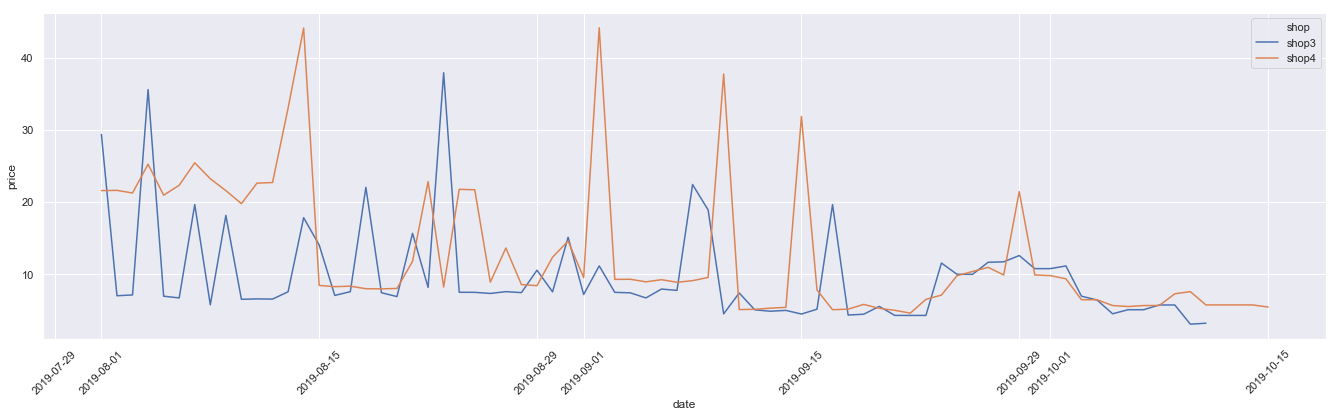

In [248]:
# code here
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(23,6))

sns.lineplot(x="date", y="price", hue="shop",data=df_final, estimator='mean',ci=None)
plt.xticks(rotation=45)
plt.show()

Evolution of median price per shop

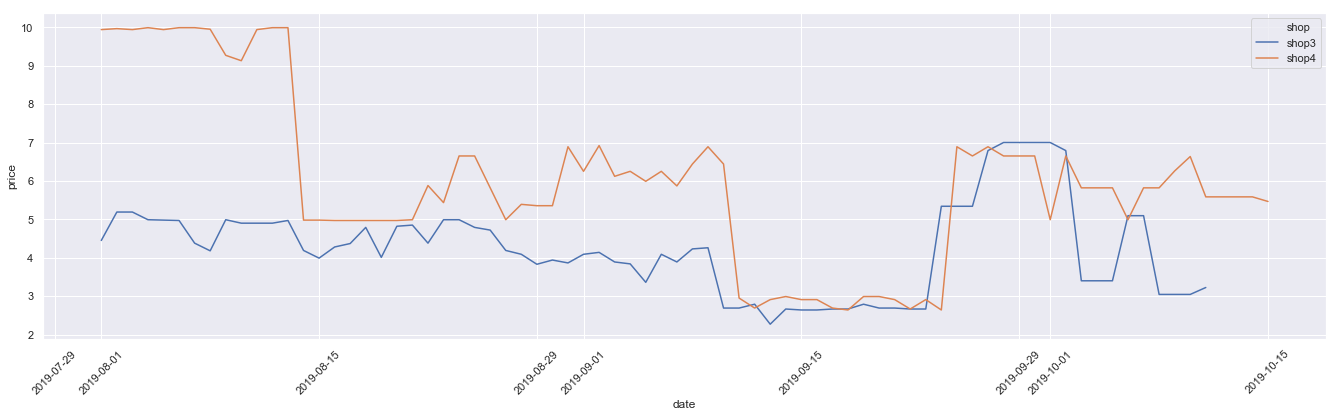

In [249]:
plt.figure(figsize=(23,6))
sns.lineplot(x="date", y="price", hue="shop",data=df_final, estimator='median',ci=None)
plt.xticks(rotation=45)
plt.show()

Evolution of volume with promotions per shop 

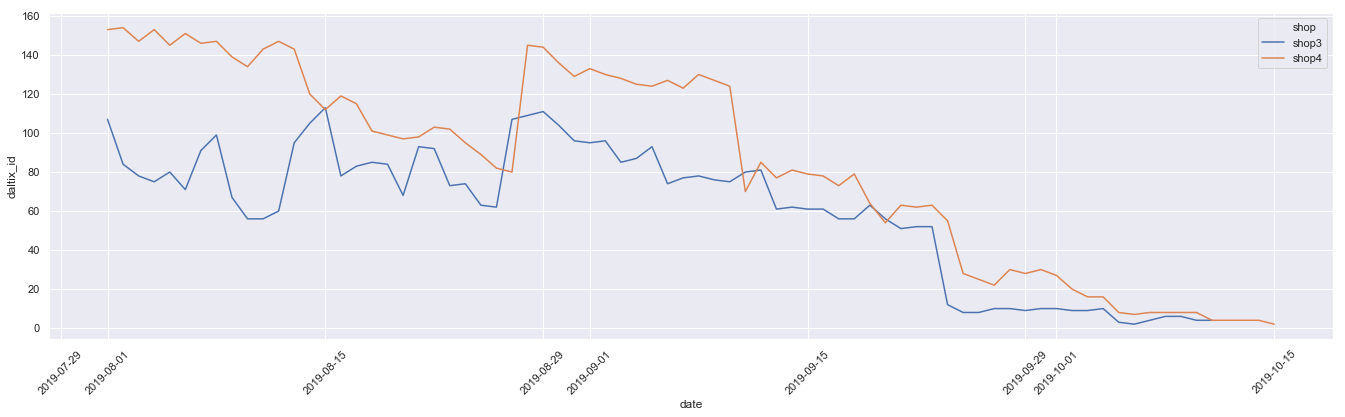

In [250]:
plt.figure(figsize=(23,6))
sns.lineplot(x="date", y="daltix_id", hue="shop",data=df_final, estimator='count',ci=None)
plt.xticks(rotation=45)
plt.show()

**Dlevel plots**

Evolution of mean dlevel 

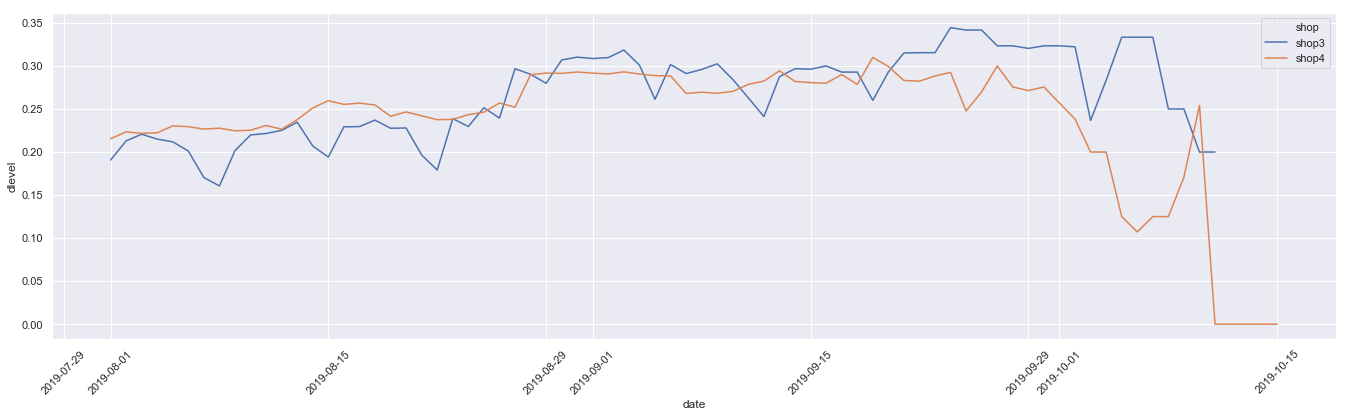

In [251]:
plt.figure(figsize=(23,6))
sns.lineplot(x="date", y="dlevel", hue="shop",data=df_final, estimator='mean',ci=None)
plt.xticks(rotation=45)
plt.show()

Evolution of median dlevel

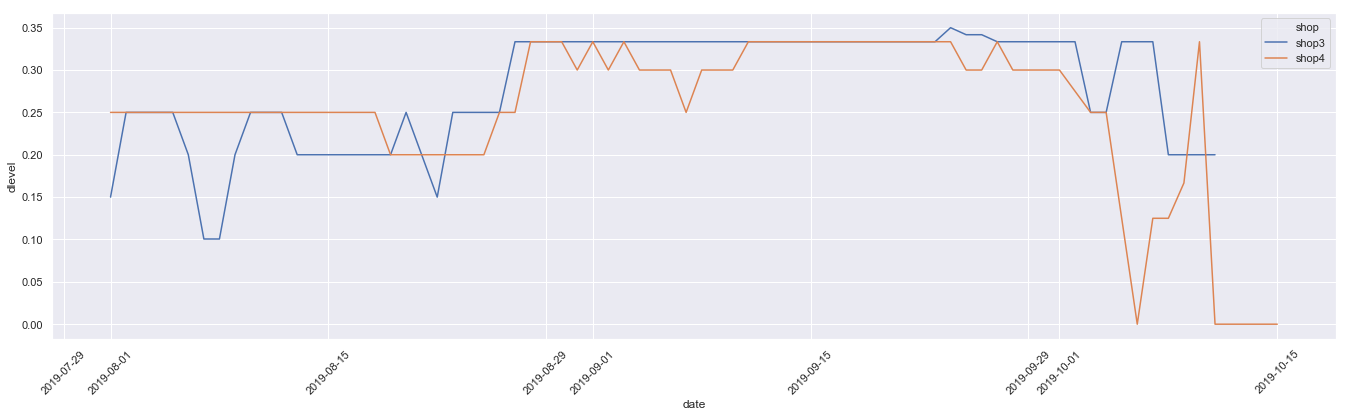

In [252]:
plt.figure(figsize=(23,6))
sns.lineplot(x="date", y="dlevel", hue="shop",data=df_final, estimator='median',ci=None)
plt.xticks(rotation=45)
plt.show()

We can clearly see the effects of seasonality on the above plots and by the end of August we see an increase in terms of discounts. This is probably due to some end of summer sales promotion
because is also the period where we have a higher probability of getting good discounts (confirmed by the dlevel median plot). Also the median and average value of prices for that particular season are one of the lowest. These evidences confirm my answer to question 4 of the last chapter and that end of summer should be the best time for shopping.

Also since I did not answer to the question _Can you spot any weird price behaviour?_ in the last chapter I will try to answer it now. For shop 4 on the plot that has the median price we can see some big spikes in mid-October. It seems that shop 4 provides highest prices throughout all year and when sale periods start prices decrease immediately. Also the same for when those periods end with prices increasing a lot. Shop 3 seems to have lower prices throughout the time period, and when sale period starts prices or ends prices to not range so aggressively. 

___________________
## 5. Discussion

__Description__

Take some time to prepare some up-coming questions!

* If given more time, how would you further refine your analysis? 
* What other information would you like to have to provide more valuable insigths?

#### ANSWER HERE
* I would like to do an analysis of prices that don't have any discount
* I would like to have some plots regarding the different categories, studying their price and discount evolution with the goal of understanding when is it the best time to acquire a certain type of prodcut
* I would also like to perform some analysis regarding brands, and check which brands provide the best price for products of the same category
* Study how the same shop behaves in different locations
* Create some sort of map using the locations
* Overall I think I would like to better refine and confirm my analysis on each individual dataset and also the master file with the aggregation of everything. I think some of the questions could be also answered without joining all the files. For example by aggregating the promotions file I got only results for Belgium, and it would be cool to see things for other shop 1 and shop 2. Unfortunately I did not have enough time to do it :(
* I would also refine the text that I wrote since some column values are bold and italian and I would like to do that for every text piece available 
* I would also refine my comments on each code block
* Also I hope you guys do not mind the usage of pandas profilling. I tried to use pandasql throughout the chapter 2 but I know that many of the operations provided by the profilling report should be done with pandasql. However I fe 

* In terms of extra information I would like to have also the retail sales in Belgium per date in order to better understand the discount and price variations
* It would be also useful to have the dates of each sales season and also major events for Belgium 

___________________
## 6. Bonus question

__Description__

You now have access to the nutritional values of some products:
* **nutri_tbl.csv** - https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/nutri.csv

Assuming that you have to consume between 2200 kcal and 2700 kcal per day, build a basket of 15 products for a [ketogenic diet](https://en.wikipedia.org/wiki/Ketogenic_diet). Where can we buy that basket for the cheapest price? 

__IMPORTANT__:
This is an extra question that you should only focus one if you have time. 
We will only consider your answer if you solved all the previous sections.

I would love to answer this question but unfortunately I do not have enough time to do it!